In [1]:
from rdkit import Chem
from rdkit.Chem import rdFreeSASA
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
import numpy as np
import pandas as pd

In [2]:
s = "O=C(N)c1[nH]c2c(c1)cccc2"
m = Chem.MolFromSmiles(s)

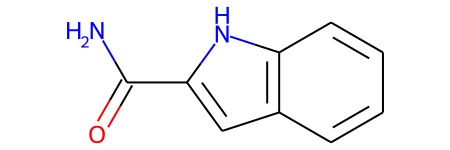

In [3]:
m

In [8]:
print(Chem.MolToSmarts(m))

[#6]-[#6]12-[#6](-[#6]-[#6]-[#6]3-[#6]-1-[#6]-[#6]-[#6]1(-[#6])-[#6]-3-[#6]-[#6]-[#6]-1)-[#6]-[#6]-[#6]-[#6]-2


In [9]:
smart = Chem.MolToSmarts(m)

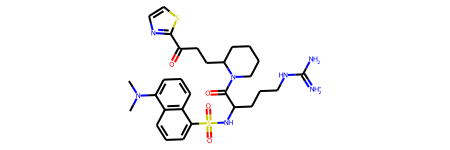

In [34]:
Chem.MolFromSmiles('CN(C)C1=CC=CC2=C1C=CC=C2[S](=O)(=O)NC(CCCNC(N)=[NH2+])C(=O)N3CCCCC3CCC(=O)C4=NC=CS4', sanitize = False)

In [32]:
def Mol2MolSupplier (file=None,sanitize=True):
    mols=[]
    with open(file, 'r') as f:
        doc=[line for line in f.readlines()]

    start=[index for (index,p) in enumerate(doc) if '@<TRIPOS>MOLECULE' in p]
    finish=[index-1 for (index,p) in enumerate(doc) if '@<TRIPOS>MOLECULE' in p]
    finish.append(len(doc))
    
    interval=list(zip(start,finish[1:]))
    for i in interval:
        block = ",".join(doc[i[0]:i[1]]).replace(',','')
        m=Chem.MolFromMol2Block(block,sanitize=sanitize)
        mols.append(m)
    return(mols)

In [4]:
data = pd.read_csv('smiles.txt', header = 0)
print(list(data))
data

['smiles']


,smiles
0,ClC1=C2C(=N[N](C(=O)C3=CC=CC=C3)C(=C2C(=C1)Cl)...
1,ClC1=CC(=CC(=C1)NC2=C3CCCCC=C3N(C2=O)C4=CC(=CC...
2,ClC1=CC=C(NC2=C3CCCCC=C3N(C2=O)C4=CC(=C(Cl)C=C...
3,CC1=CC=C(NC2=C3CCCCC=C3N(C2=O)C4=CC(=C(C)C=C4)...
4,CC1CC=C2N(C(=O)C(=C2C1)NC3=CC=C(C)C(=C3)Cl)C4=...
...,...
8250,COC1=CC2=C(OC(=O)C(=C2)C(=O)NNC(=O)CC#N)C=C1
8251,CCC(=O)NCC1=N[N]2CCN(CC2=C1)C(=O)C3=CC=NC=C3F
8252,OCC(O)C1=N[N]2CCN(CC(=O)NCC3=NC=CC=C3)CC2=C1
8253,CN(C)CCNC(=O)C1=N[N]2CCN(CC2=C1)C(=O)C3=CN=CC=N3


,smiles,Molecule
0,ClC1=C2C(=N[N](C(=O)C3=CC=CC=C3)C(=C2C(=C1)Cl)...,
1,ClC1=CC(=CC(=C1)NC2=C3CCCCC=C3N(C2=O)C4=CC(=CC...,
2,ClC1=CC=C(NC2=C3CCCCC=C3N(C2=O)C4=CC(=C(Cl)C=C...,
3,CC1=CC=C(NC2=C3CCCCC=C3N(C2=O)C4=CC(=C(C)C=C4)...,
4,CC1CC=C2N(C(=O)C(=C2C1)NC3=CC=C(C)C(=C3)Cl)C4=...,

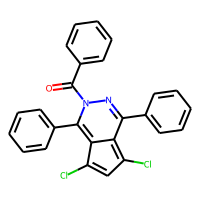
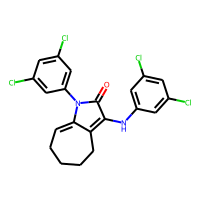
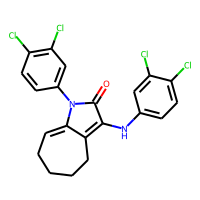
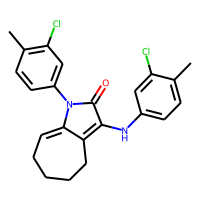
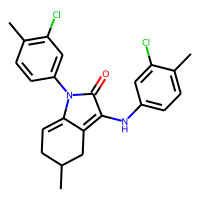

In [5]:
PandasTools.AddMoleculeColumnToFrame(data, 'smiles', 'Molecule')
data.head()

,smiles,Molecule
0,ClC1=C2C(=N[N](C(=O)C3=CC=CC=C3)C(=C2C(=C1)Cl)...,
1,ClC1=CC(=CC(=C1)NC2=C3CCCCC=C3N(C2=O)C4=CC(=CC...,
2,ClC1=CC=C(NC2=C3CCCCC=C3N(C2=O)C4=CC(=C(Cl)C=C...,
3,CC1=CC=C(NC2=C3CCCCC=C3N(C2=O)C4=CC(=C(C)C=C4)...,
4,CC1CC=C2N(C(=O)C(=C2C1)NC3=CC=C(C)C(=C3)Cl)C4=...,
...,...,...
8250,COC1=CC2=C(OC(=O)C(=C2)C(=O)NNC(=O)CC#N)C=C1,
8251,CCC(=O)NCC1=N[N]2CCN(CC2=C1)C(=O)C3=CC=NC=C3F,
8252,OCC(O)C1=N[N]2CCN(CC(=O)NCC3=NC=CC=C3)CC2=C1,
8253,CN(C)CCNC(=O)C1=N[N]2CCN(CC2=C1)C(=O)C3=CN=CC=N3,

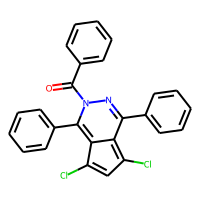
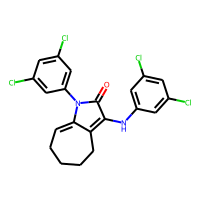
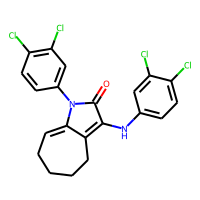
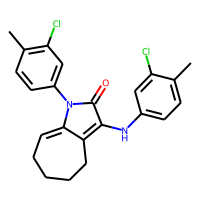
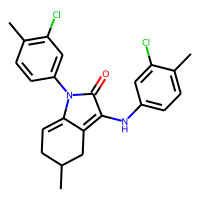
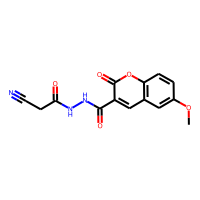
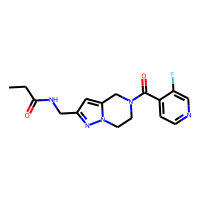
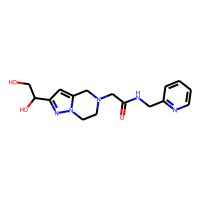
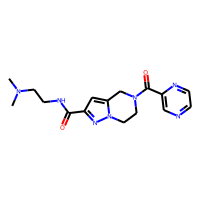
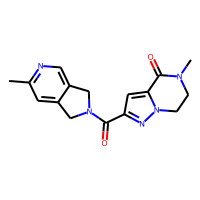

In [11]:
data

In [6]:
indole_amino = data[data['Molecule'] >= m]

,smiles,Molecule
7,CCC1=CC=C(C=C1)/C(C)=N/NC(=O)C2=C(C3=CC=CC=C3)...,
8,CCC1=CC=C(C=C1)/C(C)=N/NC(=O)C2=C(C3=CC=CC=C3)...,
182,CCCCCOC1=CC=C(C=C1)/C=N/NC(=O)C2=C(C3=CC=CC=C3...,
224,CNC(=O)C1=CC2=C(C=CC(=C2)OC)[N]1CCN(CC3=CC=CC=...,
1587,C[N]1C(=CC2=C1C=CC=C2)C(=O)NC3=C(C=CC=C3)C(=O)...,
...,...,...
8104,COC1=CC2=C([NH]C(=C2C)C(=O)N3CCC4=C(C3)N=CNC4=...,
8155,COC1=CC2=C(C=C1)C=C([N]2C)C(=O)N3CC[N]4C=NC=C4C3,
8159,C[N]1C2=C(C=CC=C2)C=C1C(=O)N3CCC(CC3)C(N)=O,
8169,C[N]1C2=C(C=C(F)C=C2)C(=C1C(=O)N3CC[N]4N=C(CO)...,

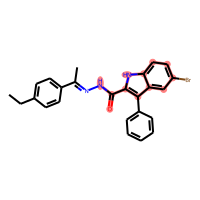
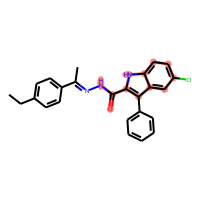
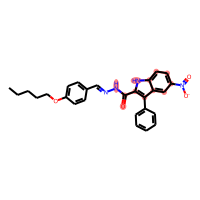
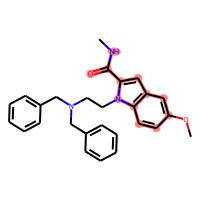
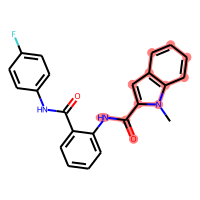
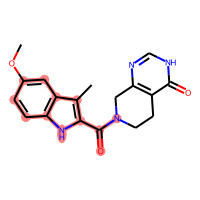
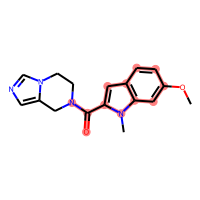
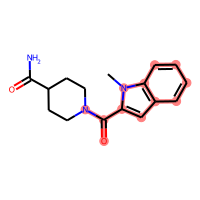
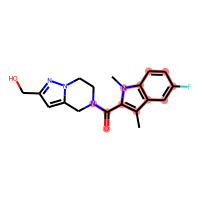
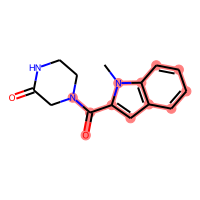

In [7]:
indole_amino

In [8]:
del indole_amino['Molecule']

In [9]:
indole_amino.to_csv('indole.csv')